In [ ]:
#  train_model.py (Run this in Colab or any notebook)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import joblib
import pandas as pd

#  Load your data
# Make sure you replace this with your real dataset
data = pd.read_csv("/content/adult 3.csv")
#redundancy
data.occupation.replace({'?':'others'},inplace=True)
data.workclass.replace({'?':'Notlisted'},inplace=True)
data=data[data['workclass']!='without-pay']
data = data[data['education'].isin(['5th-6th', '1st-4th', 'Never-worked'])]
data.drop(columns=['race'],inplace=True)
data.drop(columns=['education'],inplace=True)

# lable encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['workclass']=encoder.fit_transform(data['workclass'])
data['marital-status']=encoder.fit_transform(data['marital-status'])
data['occupation']=encoder.fit_transform(data['occupation'])
data['gender']=encoder.fit_transform(data['gender'])
data['relationship']=encoder.fit_transform(data['relationship'])
data['native-country']=encoder.fit_transform(data['native-country'])

# Example: Assuming your features and label look like this
X = data.drop("income", axis=1)
y = data["income"]

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
}
results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    acc = accuracy_score(y_test, pipe.predict(X_test))
    results[name] = acc
    print(f"{name}: {acc:.4f}")

#  Pick the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

# Final pipeline with best model
best_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', best_model)
])
best_pipe.fit(X_train, y_train)

#  Save the pipeline
# joblib.dump(best_pipe, "model_pipeline.pkl")
# Save features manually
joblib.dump((best_pipe, X_train.columns.tolist()), "model_pipeline.pkl")

print(f" Saved {best_model_name} with accuracy {results[best_model_name]:.4f}")


/tmp/ipython-input-24-2989080983.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'others'},inplace=True)
/tmp/ipython-input-24-2989080983.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

Logistic Regression: 0.7500
Random Forest: 0.9539
 Saved Random Forest with accuracy 0.9539


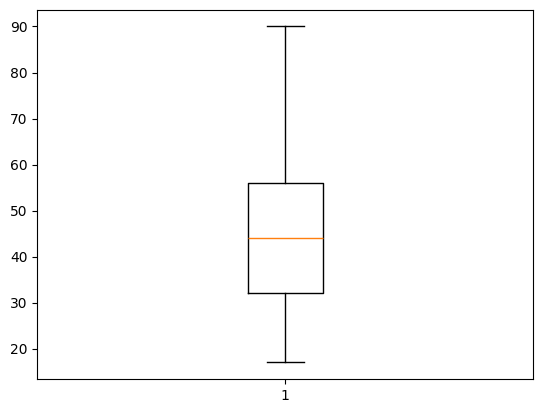

In [ ]:
#outliers
import matplotlib.pyplot as plt
plt.boxplot(data['age'])
plt.show()

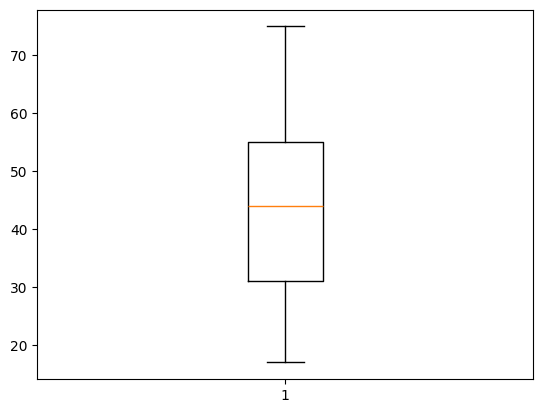

In [ ]:
data=data[(data['age']<=75) & (data['age']>=17)]
plt.boxplot(data['age'])
plt.show()

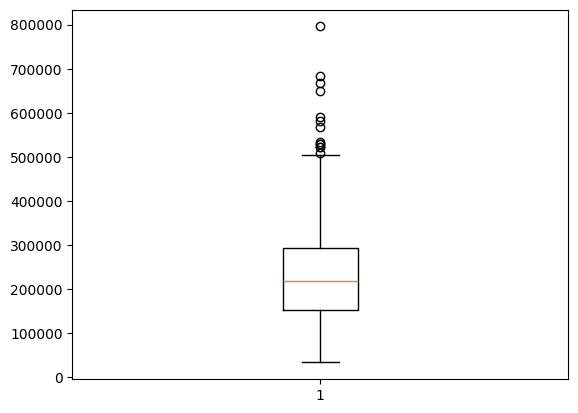

In [ ]:
plt.boxplot(data['fnlwgt'])
plt.show()

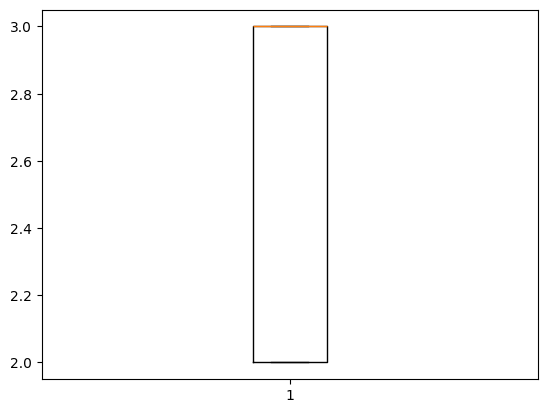

In [ ]:
plt.boxplot(data['educational-num'])
plt.show()

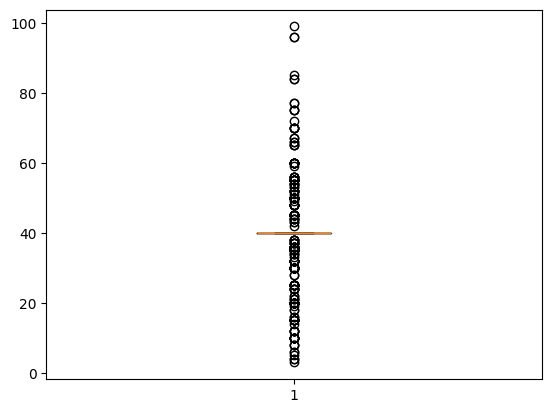

In [ ]:
plt.boxplot(data['hours-per-week'])
plt.show()

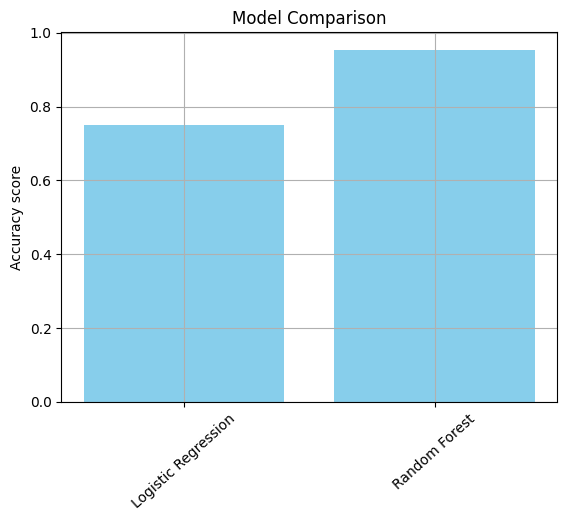

In [ ]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy score')
plt.title('Model Comparison')
plt.xticks(rotation=42)
plt.grid(True)
plt.show()

In [ ]:
!pip install streamlit
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 105.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd

# Load the trained model
model = joblib.load("model_pipeline.pkl")

st.set_page_config(
    page_title="Employee Salary Predictor",
    page_icon="💼",
    layout="centered"
)

st.title("##💼 Employee Salary Predictor")
st.write("This app predicts whether an employee's salary is >50K or <=50K")

# Input form
age = st.number_input("🎂Age", min_value=18, max_value=65, value=30)
workclass = st.selectbox("🏢 Workclass", ["Private", "Self-emp", "Gov", "Other"])
educational = st.selectbox("🎓 Education Level", [
    "10th", "11th", "12th", "HS-grad", "Some-college", "Assoc-acdm", "Assoc-voc",
    "Bachelors", "Masters", "Doctorate", "Prof-school"
])
marital_status = st.selectbox("💍 Marital Status", ["Never-married", "Married", "Divorced", "Separated", "Widowed"])
occupation = st.selectbox("🛠️ Occupation", [
    "Tech-support", "Craft-repair", "Other-service", "Sales", "Exec-managerial", "Machine-op-inspct",
    "Adm-clerical", "Armed-Forces", "Farming-fishing", "Handlers-cleaners", "Priv-house-serv",
    "Prof-specialty", "Protective-serv", "Transport-moving", "Unknown"
])
gender = st.radio("👤Gender", ["Male", "Female"])
experience = st.number_input("📈 Years of experience", min_value=0, max_value=50)

# Predict button
if st.button("🔍 Predict Salary"):
    input_data = pd.DataFrame({
        'age': [age],
        'workclass': [workclass.lower()],
        'educational': [educational],
        'marital-status': [marital_status.lower()],
        'occupation': [occupation.lower()],
        'gender': [gender.lower()],
        'experience': [experience]
    })

    # Match columns (align with what model was trained on)
    input_encoded = pd.get_dummies(input_data)

    # Align features
    # try:
    # feature_names = model.named_steps['model'].feature_names_in_
    # Load model and feature names
    model, feature_names = joblib.load("model_pipeline.pkl")

    # except:
    #     st.error("Error: Model does not contain feature info.")
    #     st.stop()

    input_encoded = input_encoded.reindex(columns=feature_names, fill_value=0)

    # Predict
    prediction = model.predict(input_encoded)[0]
    label = ">50K" if prediction == 1 else "<=50K"
   # st.success(f"Predicted Salary Range: {label}")
     # Display result with color
    st.markdown("### 📊 Prediction Result")
    if prediction == 1:
        st.success("✅ The predicted salary range is **>50K**")
    else:
        st.error("❌ The predicted salary range is **<=50K**")


Overwriting app.py


In [ ]:
import os

# Create .streamlit folder if it doesn't exist
os.makedirs(".streamlit", exist_ok=True)


In [ ]:
%%writefile .streamlit/config.toml
[theme]
primaryColor = "#00FFAA"
backgroundColor = "#1E1E1E"
secondaryBackgroundColor = "#31333F"
textColor = "#FAFAFA"
font = "monospace"


Overwriting .streamlit/config.toml


In [ ]:
!ngrok authtoken 302mq4aW1VgSnZCyBHSESozRQTD_4NP8sBDVwGB6JzFQSAYZL

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import os
import threading
from pyngrok import ngrok
# Kill any existing tunnels to avoid errors
ngrok.kill()

def run():
    os.system("streamlit run app.py")

thread = threading.Thread(target=run)
thread.start()

# Expose the app
public_url = ngrok.connect(8501)
print(f"🔗 Your app is live at: {public_url}")


🔗 Your app is live at: NgrokTunnel: "https://0f0ab9d60e34.ngrok-free.app" -> "http://localhost:8501"
